<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-60/blob/main/Reto_Equipo_60_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


🚀 **Reto-> Entrega 1**: Limpieza, análisis, visualización y kmeans. Implementar conocimientos adquiridos a lo largo de curso en el desarrollo de un proyecto con datos reales.

📑 **Asignatura:** Ciencia y analítica de datos

📚 **Grupo:** 60

🧑 **Alumnos:** 
> Alberto José García Porras (Matrícula No. **A01793509**)

>  Erick Johan Najera Olivero (Matrícula No. **A01793506**)

👩 **Profesora**: María de la Paz Rico Fernández

📅 Noviembre 16 del 2022

---

---

# 📑 **PARTE 1: LIMPIEZA, ANÁLISIS, VISUALIZACIÓN Y AGRUPAMIENTO DE DATOS**

---



---


## 👣 **Obtener Datos:** En nuestro caso seleccionamos la base de datos de aguas subterraneas;



---


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

db = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-60/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

dfAguasSubterraneas = pd.read_csv(db)
dfAguasSubterraneas.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


---


## 👣 **Limpieza:** Inicialmente validamos datos perdidos en nuestro conjunto para realizar la limpieza requerida;



---

In [ ]:
#Verificamos si existen datos perdidos en nuestro conjunto
print("¿Existen datos perdidos en el conjunto?")
if(dfAguasSubterraneas.isna().values.any())==True:
  print("Sí")
else:  
  print("No")

¿Existen datos perdidos en el conjunto?
Sí


Text(0, 0.5, 'Número de Registros')

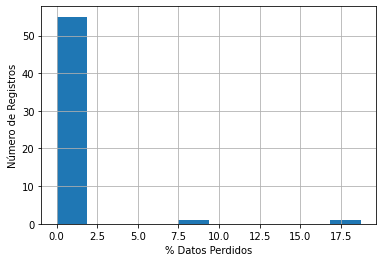

In [ ]:
#Graficamos con un histograma el porcentaje de datos perdidos según el número de registros
FilasNA = dfAguasSubterraneas.isna().sum(axis=0) / len(dfAguasSubterraneas.columns)
AS_FilasNA = FilasNA.hist()
AS_FilasNA.set_xlabel('% Datos Perdidos')
AS_FilasNA.set_ylabel('Número de Registros')

---

🔎 Vemos que para la gran mayoría de registros el porcentaje de datos perdidos no llega al **2.5%**, sin embargo, observamos algunos registros con datos perdidos entre el **7.5%** y más del **17.5%**. Entraremos a revisar el detalle de cada columna a continuación.

---

In [ ]:
#Validamos a continuación cuales son las columnas con datos perdidos para determinar el porcentaje sobre el total.
ColumnasNA=dfAguasSubterraneas.columns[dfAguasSubterraneas.isna().any()].tolist()
print("*************************************************")
print("Las siguientes columnas presentan datos perdidos:")
print("*************************************************")
dfAguasSubterraneas[ColumnasNA].dtypes

*************************************************
Las siguientes columnas presentan datos perdidos:
*************************************************


ALC_mg/L             float64
CALIDAD_ALC           object
CONDUCT_mS/cm        float64
CALIDAD_CONDUC        object
SDT_mg/L             float64
SDT_M_mg/L            object
CALIDAD_SDT_ra        object
CALIDAD_SDT_salin     object
DUR_mg/L              object
CALIDAD_DUR           object
N_NO3_mg/L            object
CALIDAD_N_NO3         object
CONTAMINANTES         object
dtype: object

---

🔎 Existen 3 columnas con tipo de dato numérico y 10 columnas con tipo de dato object que presentan datos perdidos.

---

In [ ]:
#Verificamos el porcentaje de datos perdidos por columna.
print("*******************************************************************")
print("El porcentaje de datos perdidos para las columnas identificadas es:")
print("*******************************************************************")
round(dfAguasSubterraneas[dfAguasSubterraneas.columns[dfAguasSubterraneas.isnull().any()]].isnull().sum() * 100 / dfAguasSubterraneas.shape[0],2)

*******************************************************************
El porcentaje de datos perdidos para las columnas identificadas es:
*******************************************************************


ALC_mg/L               0.37
CALIDAD_ALC            0.37
CONDUCT_mS/cm          0.56
CALIDAD_CONDUC         0.56
SDT_mg/L             100.00
SDT_M_mg/L             0.19
CALIDAD_SDT_ra         0.19
CALIDAD_SDT_salin      0.19
DUR_mg/L               0.09
CALIDAD_DUR            0.09
N_NO3_mg/L             0.09
CALIDAD_N_NO3          0.09
CONTAMINANTES         40.64
dtype: float64

---

🔎 Observamos que la columna "**SDT_mg/L**" presenta un **100%** de datos perdidos, por lo cual deberíamos validar la incidencia de esta columna en la clasificación requerida para el modelo según el detalle que nos puedan entregar los responsables de la fuente de información. Para el caso del ejercicio procederemos a eliminarla, ya que al no tener información se hace irrelevante su uso.

---



In [ ]:
#Eliminamos la columna que no contiene información "SDT_mg/L" y verificamos nuevamente el porcentaje de datos perdidos por columna.
dfAguasSubterraneas.drop('SDT_mg/L', axis=1, inplace=True)
print("*******************************************************************")
print("El porcentaje de datos perdidos para las columnas identificadas es:")
print("*******************************************************************")
round(dfAguasSubterraneas[dfAguasSubterraneas.columns[dfAguasSubterraneas.isnull().any()]].isnull().sum() * 100 / dfAguasSubterraneas.shape[0],2)

*******************************************************************
El porcentaje de datos perdidos para las columnas identificadas es:
*******************************************************************


ALC_mg/L              0.37
CALIDAD_ALC           0.37
CONDUCT_mS/cm         0.56
CALIDAD_CONDUC        0.56
SDT_M_mg/L            0.19
CALIDAD_SDT_ra        0.19
CALIDAD_SDT_salin     0.19
DUR_mg/L              0.09
CALIDAD_DUR           0.09
N_NO3_mg/L            0.09
CALIDAD_N_NO3         0.09
CONTAMINANTES        40.64
dtype: float64

---

🔎 Observamos que la columna "**CONTAMINANTES**" presenta un **40.64%** de datos perdidos, en este caso establecimos como umbral el 50% de datos perdidos para eliminar la columna, ya que asumimos que con más del 50% de datos perdidos la columna pierde importancia para el modelo. En este caso procederemos más adelante a ajustar los datos perdidos con la moda de la columna.

---


A continuación vamos a obtener los valores no numéricos para aquellas columnas que en la fuente de información deberían ser numéricos, con el fin de realizar el reemplazo de los valores antes de proceder con el cambio del tipo de dato en las columnas.

In [54]:
#Creamos el dataframe "dfnum" solo con las columnas numéricas del conjunto de datos original.
dfnum = dfAguasSubterraneas[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

#Creamos una lista para almacenar todos los valores no numéricos que encontramos en las columnas del nuevo dataframe
list_nn = list()
for col in range(len(dfnum)):
  for fil in dfnum.iloc[col]:
     tem=str(fil)
     if(tem.isnumeric()==False):
        #Asignamos el valor no numérico encontrado a la lista.
        list_nn.append(fil)  

#Eliminamos los valores duplicados encontrados
list_nn_final=list(dict.fromkeys(list_nn))
#Convertimos todos los valores de la lista a 'str'
list_nn_final=list(map(str,list_nn_final))
#Ordenamos la lista en forma descendente
list_nn_final.sort(reverse=True)
print("*******************************************************************************************")
print("Los siguientes son valores no numéricos encontrados en columnas que deberían ser numéricas:")
print("*******************************************************************************************")
list_nn_final

*******************************************************************************************
Los siguientes son valores no numéricos encontrados en columnas que deberían ser numéricas:
*******************************************************************************************


['nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 '<25',
 '<20',
 '<1.1',
 '<0.2',
 '<0.025',
 '<0.02',
 '<0.01',
 '<0.005',
 '<0.003',
 '<0.0015',
 '<0.0005',
 '999.8',
 '999.0',
 '997.3333',
 '997.3',
 '995.0',
 '994.7',
 '994.0',
 '99.79',
 '99.73',
 '99.6',
 '99.49',
 '99.0',
 '989.3216',
 '989.0',
 '986.8',
 '982.4',
 '982.3',
 '981.4',
 '98.68',
 '98.55',
 '98.37',
 '976.93',
 '976.0',
 '975.0',
 '9740.0',
 '974.0',
 '973.8',
 '973.0',
 '971.0',
 '970.0',
 '97.7354',
 '97.4806',
 '97.2258',
 '97.01',
 '967.06',
 '967.0',
 '966.6',
 '966.0',
 '965.0',
 '962.0',
 '961.3611',
 '961.0',
 '96.9808',
 '96.71',
 '959.17',
 '958.0',
 '957.0',
 '956.16',
 '955.22',
 '954.6',
 '953.0',
 '951.28',
 '951.0',
 '9503.6667',
 '950.0',
 '947.0',
 '946.4',
 '945.0',
 '943.0',
 '942.0',
 '941.0',
 '940.0',
 '94.83',
 '94.73',
 '939.0',
 '937.8',
 '937.6',
 '937.46',
 '934.0',
 '931.352',
 '931.2',
 '931.0',
 '93.624',
 '93.59',
 '93.5206',
 '93.24',
 '93.075'

---

🔎 Encontramos múltiples valores no numéricos, por ahora nos centraremos en reemplazar los valores que hacen referencia a rangos, ajustándolos al número superior dentro del rango esperado de la siguiente manera:

*   <25 = 25
*   <20 = 20
*   <1.1 = 1.1
*   <0.2 = 0.2
*   <0.025 = 0.025
*   <0.02 = 0.02
*   <0.01 = 0.01
*   <0.005 = 0.005
*   <0.003 = 0.003
*   <0.0015 = 0.0015
*   <0.0005 = 0.0005


Una vez ajustados estos valores procederemos a cambiar el tipo de dato para las columnas numéricas.

---

In [56]:
#Recorremos las columnas numéricas identificadas previamente y ejecutamos el reemplazo de los valores de rango por valores numéricos.
for Columna in dfnum.columns:
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].astype('str')
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<25','25')
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<20','20')
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<1.1','1.1') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.2','0.2') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.025','0.025') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.02','0.02') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.01','0.01') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.005','0.005') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.003','0.003') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.0015','0.0015') 
  dfAguasSubterraneas[Columna] = dfAguasSubterraneas[Columna].str.replace('<0.0005','0.0005') 
  #Cambiamos el tipo de dato a numérico 
  dfAguasSubterraneas[Columna]= dfAguasSubterraneas[Columna].astype('float')

#Validamos el tipo de dato de las columnas en el dataframe original
dfAguasSubterraneas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   float64
 15  CALIDAD_SDT_ra       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex 

---


## 👣 **Análisis:** Realizamos el análisis de los datos en nuestro conjunto;



---

---


## 👣 **Visualización:** Comenzamos con la visualización de los datos en nuestro conjunto;



---

---


## 👣 **Agrupamiento:** Ejecutamos el agrupamiento de los datos en nuestro conjunto;



---

---

# 📑 **PARTE 2: IMPLEMENTACIÓN DE CLASIFICADOR**

---
